In [1]:
import seaborn as sns
import pandas as pd
import  os 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def chebyshev_bounds(data, k , col , bound):
  """
  Calculates the upper and lower bounds for a given data set using Chebyshev's inequality.

  Args:
      data: A list or NumPy array of numerical data.
      k: A positive number representing the number of standard deviations from the mean.

  Returns:
      A tuple containing the lower bound and upper bound.
  """
  if k <= 0:
    raise ValueError("k must be a positive number")

  mean = np.mean(data)
  std = np.std(data)
  lower_bound = mean - k * std
  upper_bound = mean + k * std
  if bound == "upper":
    prob = 1/k**2
  else:
    prob = (1- ( 1/k**2))
  sns.histplot(data)
  plt.xlabel("Values")
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {col}")

  # Mark bounds and display probability
  plt.axvline(x=lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'{k}σ Lower Bound')
  plt.axvline(x=upper_bound, color='red', linestyle='dashed', linewidth=1, label=f'{k}σ Upper Bound')
  result = f"Chebyshev’s inequality {bound} bound : {prob:.2f}"
  print("*"*20)
  print(result)
  print("*"*20)
  plt.text(lower_bound + (upper_bound - lower_bound) / 5, prob,result , ha='center', va='top')  # Placement adjustment

  plt.legend()
  file_name = os.path.join(DATA_FOLDER,result.replace(" ", "")+'.png')
  plt.savefig(file_name)
  plt.show()
  return mean, std , lower_bound, upper_bound, prob 

In [3]:
DATA_FOLDER = os.path.join(os.getcwd() , "output")

os.makedirs(DATA_FOLDER, exist_ok=True)

In [4]:
DATA_FOLDER

'/mnt/d/stats2/Activity 2  stat 2/Activity 4/output'

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ilpd_indian_liver_patient_dataset = fetch_ucirepo(id=225) 
  
# data (as pandas dataframes) 
X = ilpd_indian_liver_patient_dataset.data.features 
y = ilpd_indian_liver_patient_dataset.data.targets 
  
# metadata 
print(ilpd_indian_liver_patient_dataset.metadata) 
  
# variable information 
print(ilpd_indian_liver_patient_dataset.variables) 


{'uci_id': 225, 'name': 'ILPD (Indian Liver Patient Dataset)', 'repository_url': 'https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/225/data.csv', 'abstract': 'Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes, yet female patients appear to be marginalized when it comes to early diagnosis of liver pathology. \nThe dataset comprises 584 patient records collected from the NorthEast of Andhra Pradesh, India.\nThe prediction task is to determine whether a patient suffers from liver disease based on the information about several biochemical markers, including albumin and other enzymes required for metabolism.\n', 'area': 'He

In [6]:
df = X.copy(deep=True)
df["Target"] = y.copy(deep=True )

In [7]:
col1 = "Age"
col2= "TB"

In [8]:
result1 = df[col1].describe()
result2 = df[col2].describe()
result = pd.concat([result1,result2] , axis=1 , keys=[col1 , col2])

In [9]:
result1

count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

In [10]:
result = pd.concat([result1,result2] , axis=1 , keys=[col1 , col2])

In [11]:
correlation = df[[col1, col2]].corr()  

In [12]:
result = result.T

In [13]:
result["col"] = correlation.loc[col1, col2] 

In [14]:
result

,count,mean,std,min,25%,50%,75%,max,col
Age,583.0,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0,0.011763
TB,583.0,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0,0.011763


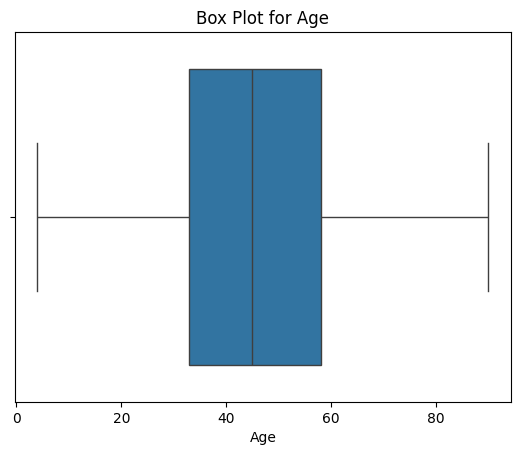

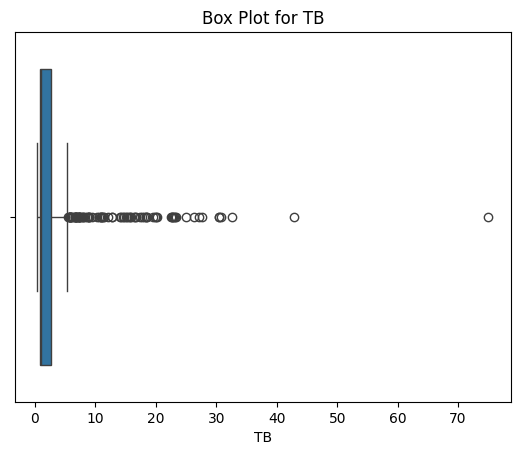


**Correlation with target:**
0.01176265141489886


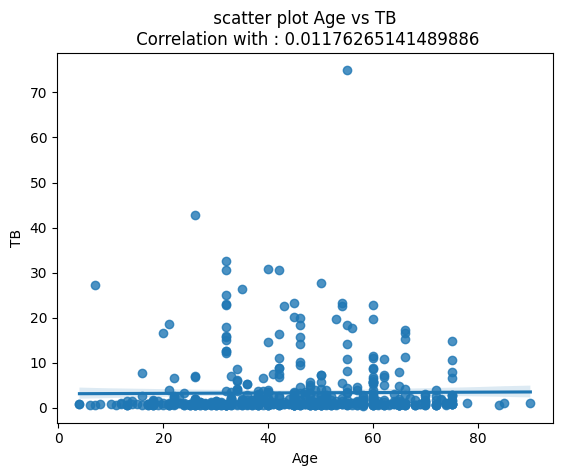

,count,mean,std,min,25%,50%,75%,max,correlations
Age,583.0,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0,0.011763
TB,583.0,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0,0.011763


<Figure size 640x480 with 0 Axes>

In [15]:
def analyze_and_visualize(data, col1, col2, target=None  , DATA_FOLDER=DATA_FOLDER):
    result1 = df[col1].describe()
    result2 = df[col2].describe()
    result = pd.concat([result1,result2] , axis=1 , keys=[col1 , col2])
    header = f"{col1} vs {col2}"
    result_file_name = os.path.join(DATA_FOLDER,header+".csv")
    #plot box plot 
    box_plot_header = f"Box Plot for {col1}"
    sns.boxplot( data=data, x=col1)
    plt.title(box_plot_header)
    box_file_name = os.path.join(DATA_FOLDER, box_plot_header+".png" )
    plt.savefig(box_file_name)
    plt.show()
    
    box_plot_header = f"Box Plot for {col2}"
    sns.boxplot( data=data, x=col2)
    plt.title(box_plot_header)
    box_file_name = os.path.join(DATA_FOLDER, box_plot_header+".png" )
    plt.savefig(box_file_name)
    plt.show()

    correlation = data[[col1, col2]].corr()  
    correlations = correlation.loc[col1, col2]
    result = result.T
    result["correlations"] = correlations
    result.to_csv(result_file_name)
    print("\n**Correlation with target:**")
    print(correlations)
    sns.regplot(x=col1, y=col2, data=data)
    
    plt.title(f' scatter plot {col1} vs {col2} \n Correlation with : {correlations}')
    plt.show()
    scatter_file_name = os.path.join(DATA_FOLDER,f'scatter plot{col1}vs{col2}.png')
    plt.savefig(scatter_file_name)
    return result
    




analyze_and_visualize(df, "Age", "TB")  # No target, no save, show plot

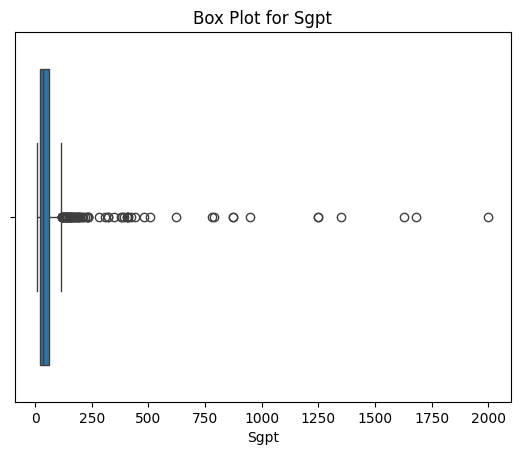

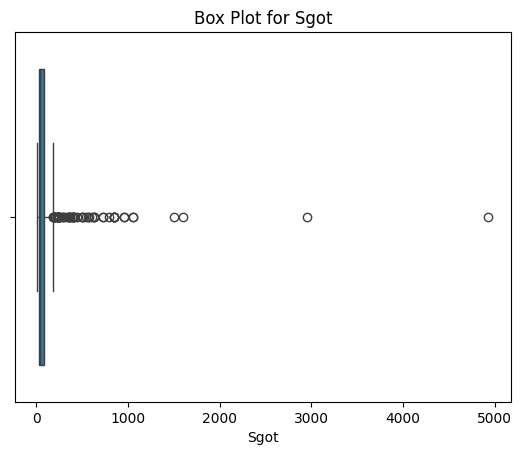


**Correlation with target:**
0.7919656848536132


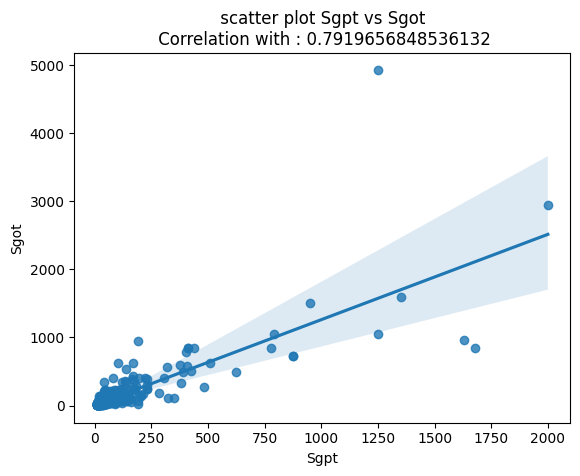

,count,mean,std,min,25%,50%,75%,max,correlations
Sgpt,583.0,80.713551,182.620356,10.0,23.0,35.0,60.5,2000.0,0.791966
Sgot,583.0,109.910806,288.918529,10.0,25.0,42.0,87.0,4929.0,0.791966


<Figure size 640x480 with 0 Axes>

In [16]:
analyze_and_visualize(df, "Sgpt", "Sgot") 

## Summary of SGPT and SGOT Levels in the ILPD

This table summarizes the distribution of serum glutamic-pyruvic transaminase (SGPT) and serum glutamic-oxaloacetic transaminase (SGOT) levels in the Indian Liver Patient Dataset (ILPD).

| Statistic | SGPT | SGOT |
|---|---|---|
| Count | 583 | 583 |
| Mean | 80.71 | 109.91 |
| Standard Deviation (SD) | 182.62 | 288.92 |
| Minimum | 10.0 | 10.0 |
| 25th Percentile (Q1) | 23.0 | 25.0 |
| 50th Percentile (Median) | 35.0 | 42.0 |
| 75th Percentile (Q3) | 60.5 | 87.0 |
| Maximum | 2000.0 | 4929.0 |
| Correlation with SGOT | 0.791966 | - |

**Interpretation:**

* Both SGPT and SGOT are liver enzymes, and elevated levels can indicate liver damage or disease.
* The mean and median values of SGOT are higher than those of SGPT, suggesting a potential difference in their typical levels.
* The large standard deviations indicate significant variability in the data, meaning individual values can deviate considerably from the average.
* The minimum values are low for both enzymes, but some extreme maximum values exist, potentially representing severe liver conditions.
* The high correlation coefficient (0.791966) suggests a strong positive correlation between SGPT and SGOT, meaning they often tend to increase or decrease together. However, correlation does not imply causation, and other factors might influence them individually.

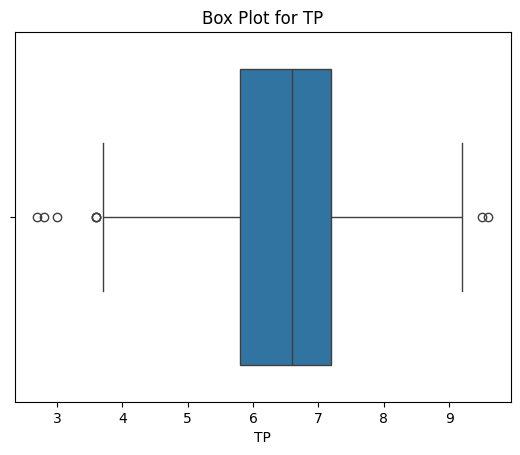

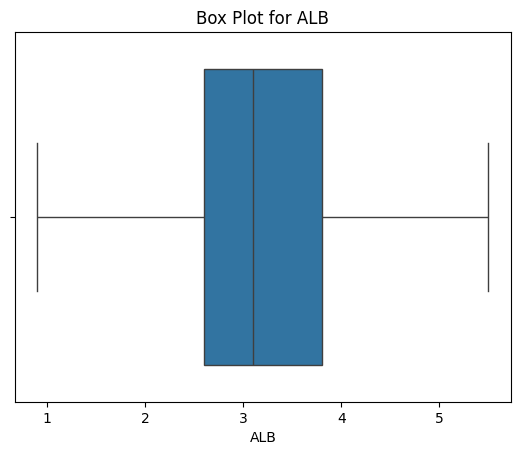


**Correlation with target:**
0.7840533353871918


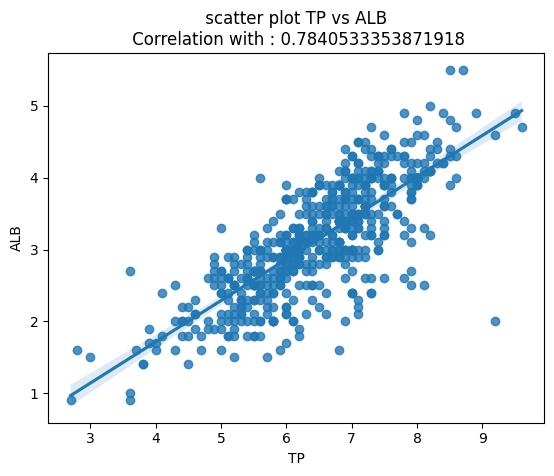

,count,mean,std,min,25%,50%,75%,max,correlations
TP,583.0,6.483190,1.085451,2.7,5.8,6.6,7.2,9.6,0.784053
ALB,583.0,3.141852,0.795519,0.9,2.6,3.1,3.8,5.5,0.784053


<Figure size 640x480 with 0 Axes>

In [17]:
analyze_and_visualize(df, "TP", "ALB") 

In [18]:
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


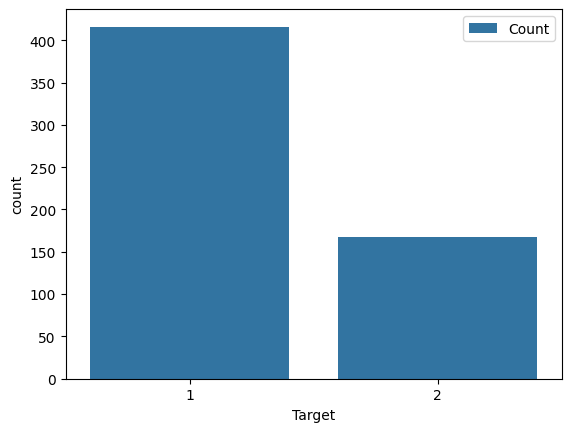

In [19]:
sns.countplot(data=df, x = 'Target', label='Count')

LD, NLD = df['Target'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [20]:
df["Gender"] = df["Gender"].map({"Male" : 1 , "Female" : 0 })

In [21]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003424,-0.082416
TB,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
DB,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkphos,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Sgpt,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Sgot,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
TP,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
ALB,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
A/G Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


In [22]:
disease_df = df[df["Target"] ==1]
non_disease_df = df[df["Target"] !=1]

In [23]:
disease_df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,1,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,1,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1


In [24]:
non_disease_df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
12,64,1,0.9,0.3,310,61,58,7.0,3.4,0.90,2
15,25,1,0.6,0.1,183,91,53,5.5,2.3,0.70,2
17,33,1,1.6,0.5,165,15,23,7.3,3.5,0.92,2
24,63,1,0.9,0.2,194,52,45,6.0,3.9,1.85,2
...,...,...,...,...,...,...,...,...,...,...,...
551,29,1,1.2,0.4,160,20,22,6.2,3.0,0.90,2
564,38,0,0.6,0.1,165,22,34,5.9,2.9,0.90,2
566,50,0,1.0,0.3,191,22,31,7.8,4.0,1.00,2
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2


## Calculation of bounds by using Chebyshev’s inequality:

In [25]:
#lets work on age 

In [26]:
col = "Age"
K = 1.45
btw = 60


********************
Chebyshev’s inequality upper bound : 0.48
********************


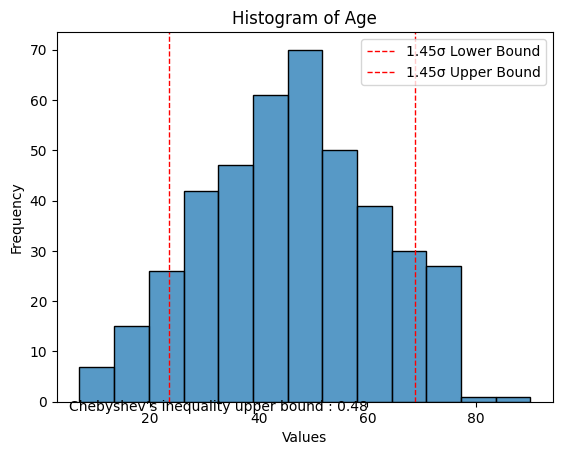

In [27]:
col = "Age"
K = 1.45
btw = 60
data = disease_df["Age"]

mean, std , lower_bound, upper_bound, prob = chebyshev_bounds(data=data , k=K , col=col , bound="upper")


********************
Chebyshev’s inequality lower bound : 0.52
********************


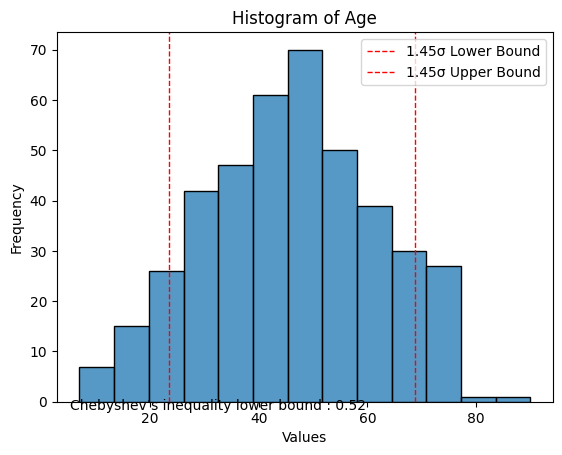

In [28]:
col = "Age"
K = 1.45
btw = 60
data = disease_df["Age"]

mean, std , lower_bound, upper_bound, prob = chebyshev_bounds(data=data , k=K , col=col , bound="lower")

********************
Chebyshev’s inequality upper bound : 0.25
********************


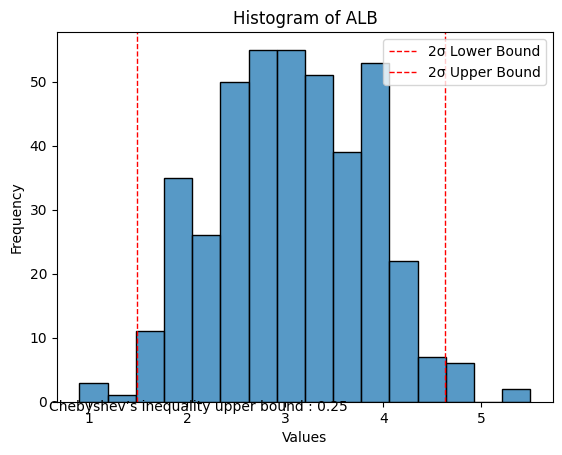

In [29]:
col = "ALB"
K = 2
btw = 60
data = disease_df[col]

mean, std , lower_bound, upper_bound, prob = chebyshev_bounds(data=data , k=K , col=col , bound="upper")

********************
Chebyshev’s inequality lower bound : 0.75
********************


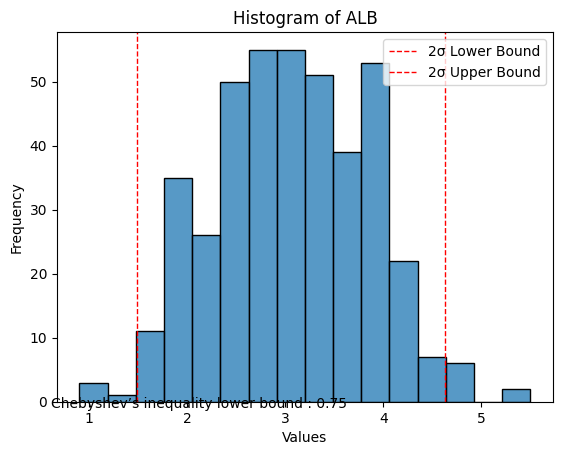

In [30]:
col = "ALB"
K = 2
btw = 60
data = disease_df[col]

mean, std , lower_bound, upper_bound, prob = chebyshev_bounds(data=data , k=K , col=col , bound="lower")

********************
Chebyshev’s inequality lower bound : 0.00
********************


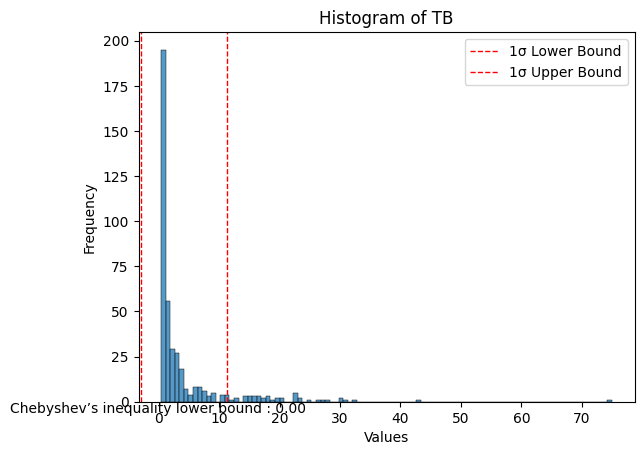

In [33]:
col = "TB"
K = 1
btw = 60
data = disease_df[col]

mean, std , lower_bound, upper_bound, prob = chebyshev_bounds(data=data , k=K , col=col , bound="lower")

********************
Chebyshev’s inequality upper bound : 0.25
********************


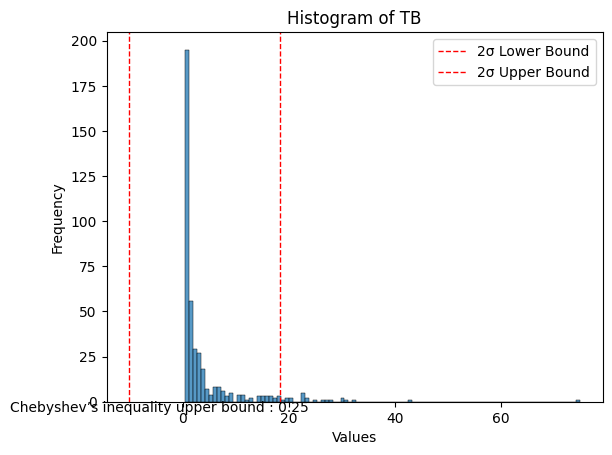

In [35]:
col = "TB"
K = 2
btw = 60
data = disease_df[col]

mean, std , lower_bound, upper_bound, prob = chebyshev_bounds(data=data , k=K , col=col , bound="upper")